In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # Adjust ".." if needed

In [3]:
from simulator import EmployeeActivitySimulator

In [4]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## 📊 EmployeeActivitySimulator Features

The simulator generates realistic employee activity data across 18 metrics from 5 data sources:

### 1. **Data Sources & Metrics**
- **Email** (4 metrics): count, length, forward/reply ratio, recipients
- **Calendar** (5 metrics): meetings, duration, cancellation rate, virtual ratio, back-to-back ratio
- **Teams** (3 metrics): messages, message length, channels used
- **Documents** (4 metrics): accessed, created, edited, shared
- **Dropbox** (2 metrics): files added, files edited

### 2. **Realistic Patterns**
- **Department Profiles**: Engineering, Sales, Management, HR, Finance
- **Seniority Levels**: Junior, Mid, Senior, Executive
- **Temporal Patterns**: Weekday/weekend, seasonal variations
- **Personal Traits**: Consistency, collaboration style, responsiveness

### 3. **Anomaly Types**
- **data_exfiltration**: Spike in document access and file transfers
- **burnout**: Gradual decline in all activities
- **overwork**: Excessive activity across all metrics
- **disengagement**: Reduced communication and collaboration
- **unusual_hours**: Off-hours/weekend activity spikes
- **communication_spike**: Sudden increase in all communication
- **policy_violation**: Unusual sharing and external communication

### 4. **Advanced Features**
- Gradual anomaly development
- Team activity correlation
- Inter-metric correlations
- Configurable intensity levels

In [5]:
simulator = EmployeeActivitySimulator(random_seed=22)

In [6]:
# This is how we define employees
employees = [
    {'id': 'sarah.chen@company.com', 'department': 'engineering', 'seniority': 'senior'},
    {'id': 'mike.jones@company.com', 'department': 'sales', 'seniority': 'mid'},
    {'id': 'lisa.wong@company.com', 'department': 'management', 'seniority': 'executive'},
    {'id': 'david.smith@company.com', 'department': 'hr', 'seniority': 'senior'},
    {'id': 'emma.taylor@company.com', 'department': 'finance', 'seniority': 'mid'},
    {'id': 'james.wilson@company.com', 'department': 'engineering', 'seniority': 'junior'},
    {'id': 'anna.martinez@company.com', 'department': 'sales', 'seniority': 'senior'}
]

In [7]:
# Date range for which the data will be simulated, we need to have 1 year  worth of data
start_date = '2024-01-01'
end_date = '2024-12-31'

## 🚨 Complete Anomaly Catalog

The simulator supports 7 distinct anomaly patterns that cover various security and behavioral concerns:

### 1. **Data Exfiltration** 🗄️
- **Pattern**: Massive spike in document access, sharing, and file transfers
- **Metrics Affected**: docs_accessed (5x), docs_shared (8x), dropbox_added (10x), email_count (2x)
- **Risk Level**: CRITICAL - Potential insider threat or compromised account
- **Use Case**: Detecting data theft before employee departure

### 2. **Burnout** 😔
- **Pattern**: Gradual decline across all activities to 30% of normal
- **Metrics Affected**: ALL metrics reduced
- **Risk Level**: MEDIUM - Employee wellbeing and productivity concern
- **Use Case**: Early intervention for employee support

### 3. **Overwork** 🔥
- **Pattern**: Excessive activity across all metrics (2.5x normal)
- **Metrics Affected**: ALL metrics increased
- **Risk Level**: MEDIUM - Sustainability and error risk
- **Use Case**: Preventing employee burnout, ensuring work-life balance

### 4. **Disengagement** 🚪
- **Pattern**: Dramatic reduction in communication and collaboration
- **Metrics Affected**: email_count (20%), teams_messages (10%), meeting_count (30%), docs_shared (10%)
- **Risk Level**: MEDIUM - Flight risk or performance issue
- **Use Case**: Retention management, performance intervention

### 5. **Unusual Hours** 🌙
- **Pattern**: Significant activity during weekends/off-hours (3x normal)
- **Metrics Affected**: ALL metrics on weekends only
- **Risk Level**: HIGH - Security concern or work-life balance issue
- **Use Case**: Detecting unauthorized access or concerning work patterns

### 6. **Communication Spike** 📢
- **Pattern**: Sudden increase in all communication channels
- **Metrics Affected**: email_count (4x), teams_messages (5x), meeting_count (3x), teams_channels (2x)
- **Risk Level**: MEDIUM - Possible crisis or unusual coordination
- **Use Case**: Detecting internal issues, project crises, or coordinated activities

### 7. **Policy Violation** ⚠️
- **Pattern**: Unusual external sharing and communication patterns
- **Metrics Affected**: email_recipients (5x), docs_shared (10x), dropbox_added (8x), meeting_virtual_ratio (0.1x)
- **Risk Level**: HIGH - Compliance and security risk
- **Use Case**: Detecting unauthorized data sharing or policy breaches

In [8]:
data = simulator.simulate_employees(employees, start_date, end_date)

In [9]:
# This is how we corelate employees of same department
engineering_team = ['sarah.chen@company.com', 'james.wilson@company.com']
simulator.add_team_correlation(engineering_team, correlation_strength=0.6)

sales_team = ['mike.jones@company.com', 'anna.martinez@company.com']
simulator.add_team_correlation(sales_team, correlation_strength=0.5)

In [10]:
anomaly_types = [
    'data_exfiltration',    # Massive spike in document/file activities
    'burnout',              # Gradual decline in all activities
    'overwork',             # Excessive activity across all metrics
    'disengagement',        # Reduced communication and collaboration
    'unusual_hours',        # Weekend/off-hours activity spikes
    'communication_spike',  # Sudden increase in all communication
    'policy_violation',     # Unusual sharing and external communication
]

In [11]:
print("   Scenario: Gradual decline after missing sales targets")
print("   Period: Oct 15 → Nov 15 (gradual over 1 month)")
simulator.inject_gradual_anomaly(
    'mike.jones@company.com',
    'burnout',
    start_date='2024-10-15',
    peak_date='2024-11-01',
    end_date='2024-11-15',
    peak_intensity=2
)

   Scenario: Gradual decline after missing sales targets
   Period: Oct 15 → Nov 15 (gradual over 1 month)
Injected burnout anomaly for mike.jones@company.com from 2024-10-15 to 2024-10-15
Injected burnout anomaly for mike.jones@company.com from 2024-10-16 to 2024-10-16
Injected burnout anomaly for mike.jones@company.com from 2024-10-17 to 2024-10-17
Injected burnout anomaly for mike.jones@company.com from 2024-10-18 to 2024-10-18
Injected burnout anomaly for mike.jones@company.com from 2024-10-19 to 2024-10-19
Injected burnout anomaly for mike.jones@company.com from 2024-10-20 to 2024-10-20
Injected burnout anomaly for mike.jones@company.com from 2024-10-21 to 2024-10-21
Injected burnout anomaly for mike.jones@company.com from 2024-10-22 to 2024-10-22
Injected burnout anomaly for mike.jones@company.com from 2024-10-23 to 2024-10-23
Injected burnout anomaly for mike.jones@company.com from 2024-10-24 to 2024-10-24
Injected burnout anomaly for mike.jones@company.com from 2024-10-25 to 20

In [12]:
for weekend_start in ['2024-03-09', '2024-03-16', '2024-03-23', '2024-03-30']:
    weekend_end = (datetime.strptime(weekend_start, '%Y-%m-%d') + timedelta(days=1)).strftime('%Y-%m-%d')
    simulator.inject_anomaly(
        'mike.jones@company.com',
        'unusual_hours',
        weekend_start,
        weekend_end,
        intensity=2
    )

Injected unusual_hours anomaly for mike.jones@company.com from 2024-03-09 to 2024-03-10
Injected unusual_hours anomaly for mike.jones@company.com from 2024-03-16 to 2024-03-17
Injected unusual_hours anomaly for mike.jones@company.com from 2024-03-23 to 2024-03-24
Injected unusual_hours anomaly for mike.jones@company.com from 2024-03-30 to 2024-03-31


In [13]:
print("   Scenario: Decline in work after end of the financial year")
print("   Period: Nov 10-30 (after announcement)")
simulator.inject_anomaly(
    'mike.jones@company.com',
    'disengagement',
    '2024-04-01',
    '2024-04-05',
    intensity=1.5
)

   Scenario: Decline in work after end of the financial year
   Period: Nov 10-30 (after announcement)
Injected disengagement anomaly for mike.jones@company.com from 2024-04-01 to 2024-04-05


In [14]:
from detector import AnomalyDetector
detector = AnomalyDetector(data,threshold_personal=1.5, enable_group_detection=False, drop_threshold=0.8)

Preprocessing data structures...
Validating data...
Processing 7 users with sufficient data
Computing anomalies...
Processed 7/7 users...
Anomaly detection complete. Processed 2562 observations for 7 users.


In [15]:
detector.get_anomalies()

{'sarah.chen@company.com': {'2024-01-01': {'date': '2024-01-01',
   'user': 'sarah.chen@company.com',
   'metrics': array([6.9800e+00, 1.8888e+02, 4.3000e-01, 1.2800e+00, 1.0700e+00,
          1.9658e+02, 6.0000e-02, 6.4000e-01, 1.8000e-01, 4.2060e+01,
          5.8920e+01, 3.5400e+00, 1.6800e+01, 2.6700e+00, 4.2400e+00,
          7.2000e-01, 4.9600e+00, 7.5200e+00]),
   'is_weekend': False,
   'weekend_skip': False,
   'is_anomaly': True,
   'overall_anomaly_score': np.float64(20142167.663414128),
   'personal_z_scores': array([4.70794550e+06, 1.27397815e+08, 2.90031027e+05, 8.63348172e+05,
          7.21705113e+05, 1.32591393e+08, 4.04694456e+04, 4.31674086e+05,
          1.21408337e+05, 2.83690813e+07, 3.97409955e+07, 2.38769729e+06,
          1.13314448e+07, 1.80089033e+06, 2.85984082e+06, 4.85633347e+05,
          3.34547417e+06, 5.07217051e+06]),
   'seasonal_adjusted_z_scores': array([4.70794550e+06, 1.27397815e+08, 2.90031027e+05, 8.63348172e+05,
          7.21705113e+05, 1.325

In [16]:
from visualizer import AnomalyVisualizer

In [17]:
viz = AnomalyVisualizer(simulator, detector)

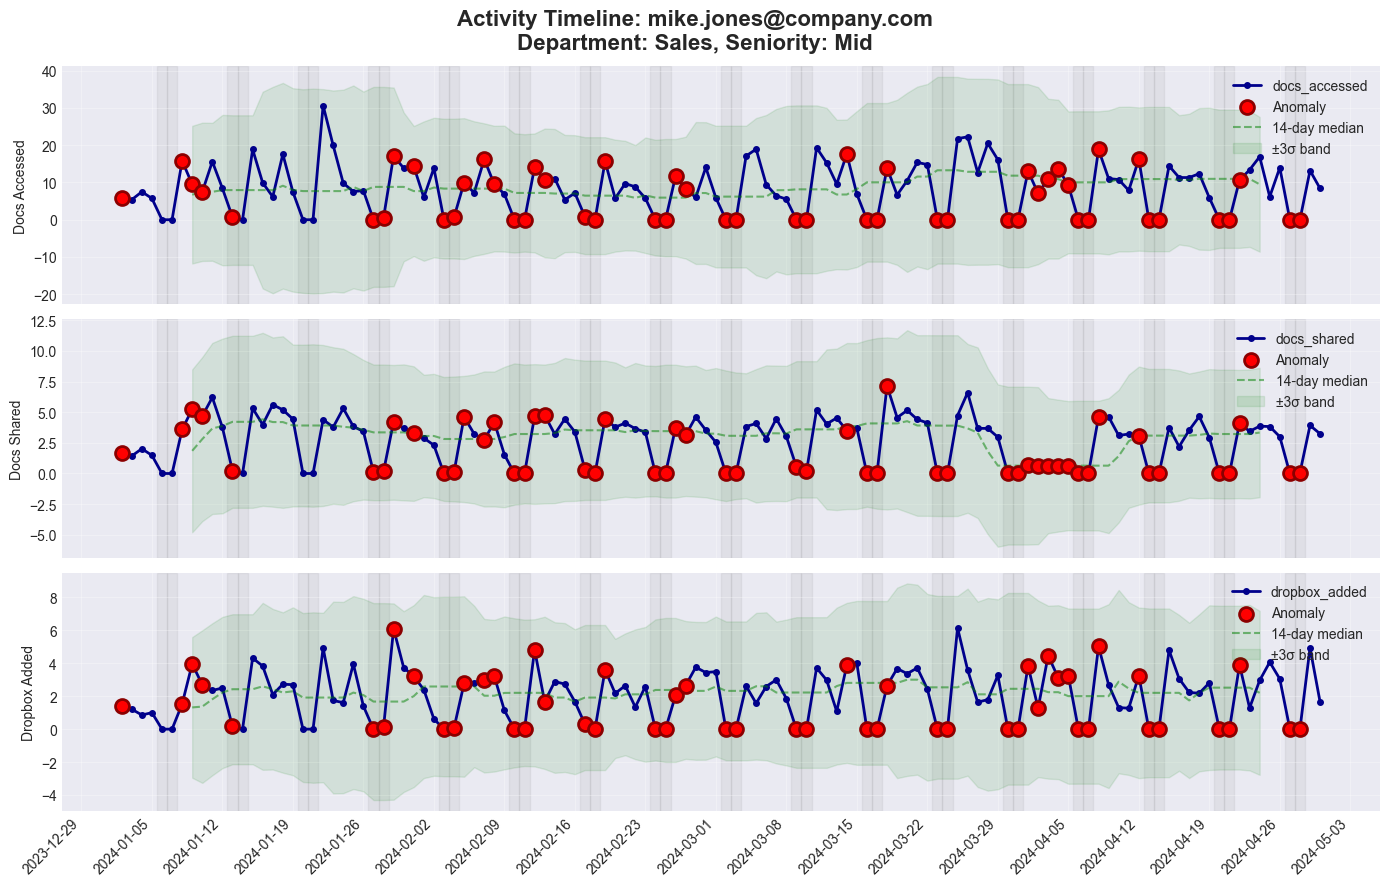

In [18]:
viz.plot_employee_timeline('mike.jones@company.com',
                          ['docs_accessed', 'docs_shared', 'dropbox_added'],
                          ("2024-01-02","2024-04-30"))

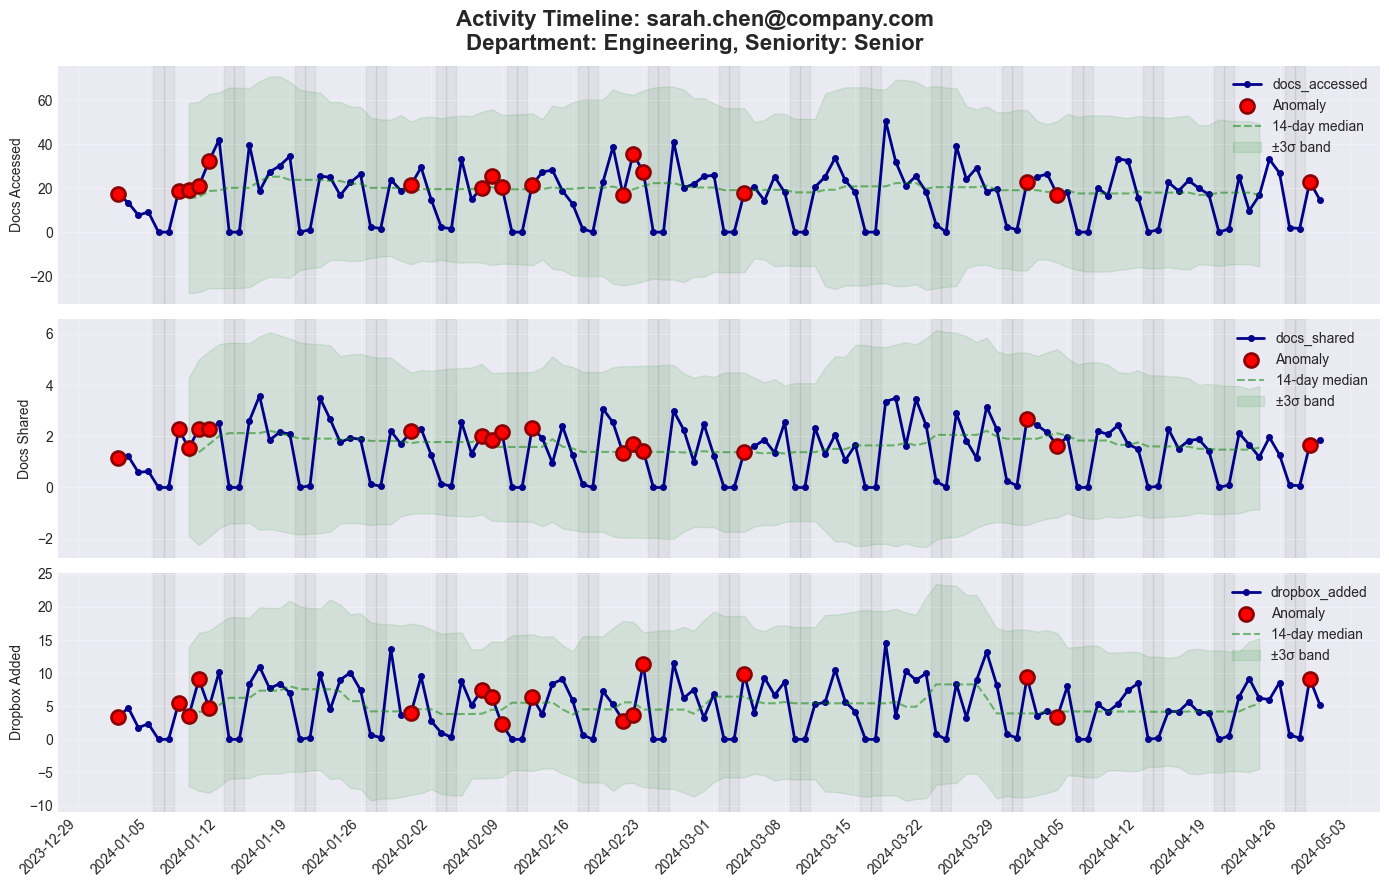

In [19]:
viz.plot_employee_timeline('sarah.chen@company.com', 
                          ['docs_accessed', 'docs_shared', 'dropbox_added'],
                          ("2024-01-02","2024-04-30"))

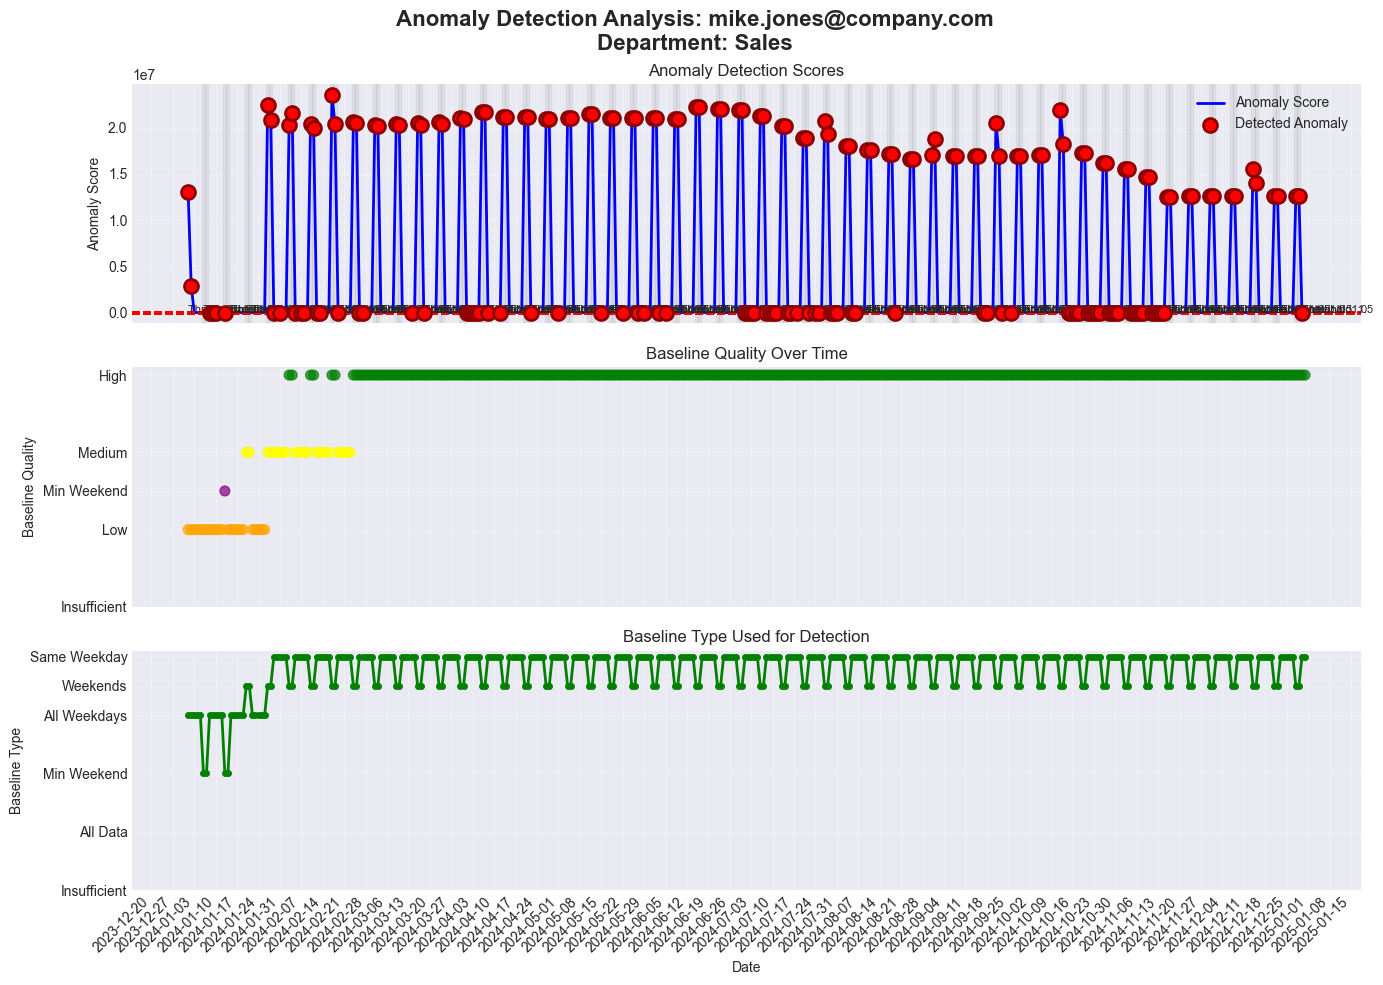

In [20]:
viz.plot_anomaly_detection_results('mike.jones@company.com')

dict_keys(['total_observations', 'total_anomalies', 'anomaly_rate', 'weekend_anomalies', 'baseline_quality_distribution', 'baseline_type_distribution', 'threshold_personal', 'threshold_group', 'group_detection_enabled', 'strict_weekday_separation', 'weekend_threshold_factor', 'avg_anomaly_score', 'median_anomaly_score', 'max_anomaly_score', 'min_baseline_days', 'lookback_window'])


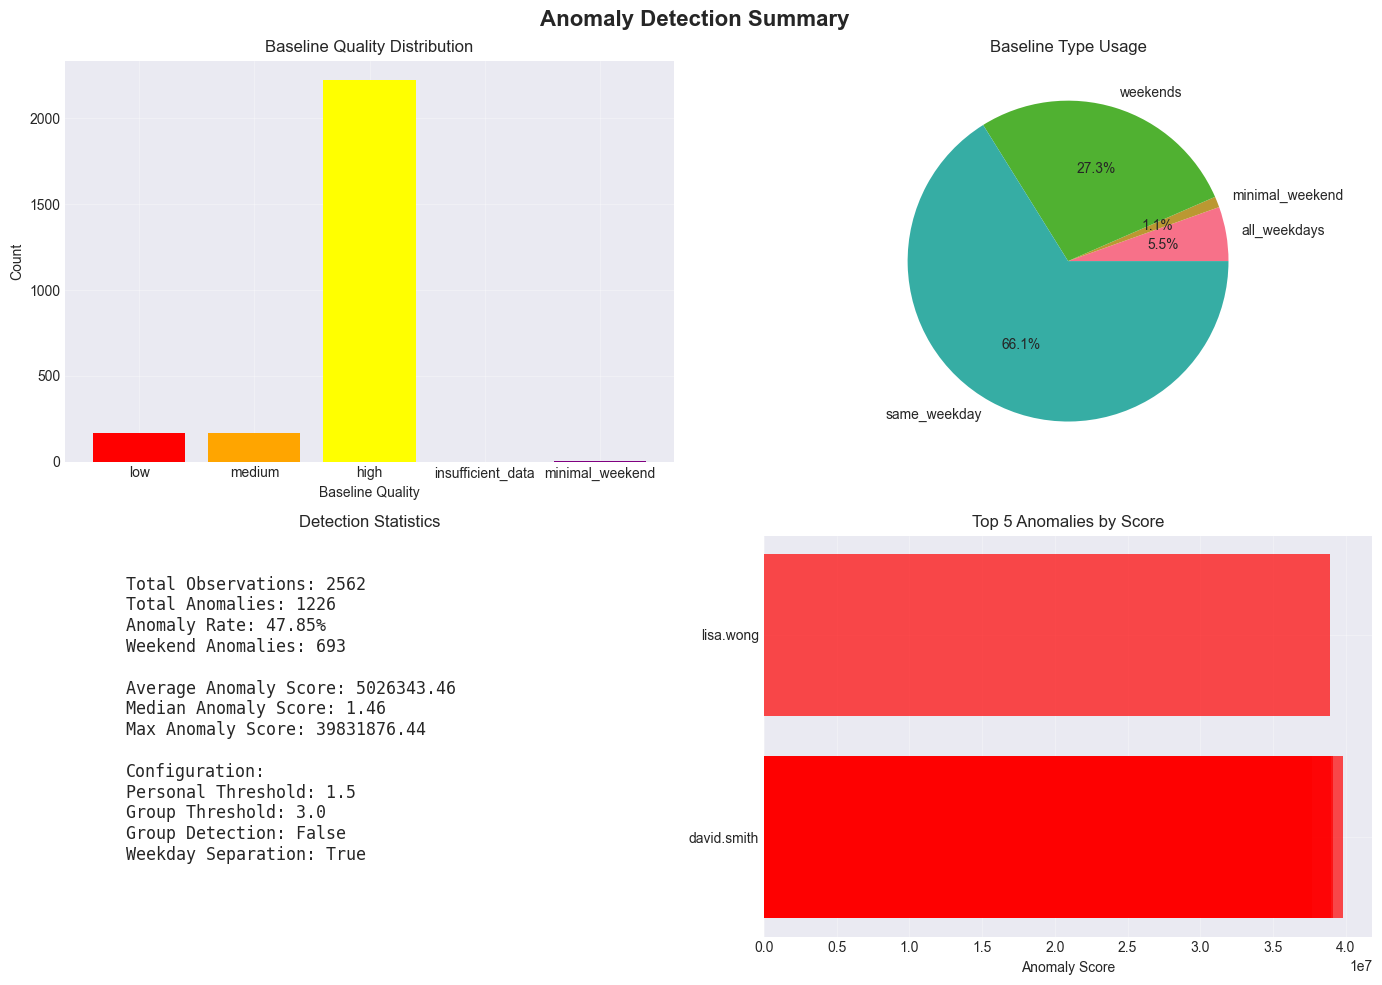

In [22]:
viz.plot_detection_summary()